<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файло-с-данными-и-объединие-их-в-один-датафрейм" data-toc-modified-id="Открытие-файло-с-данными-и-объединие-их-в-один-датафрейм-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файло с данными и объединие их в один датафрейм</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-типов-данных" data-toc-modified-id="Проверка-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка типов данных</a></span></li><li><span><a href="#Обработка-пропусков-в-датафрейме" data-toc-modified-id="Обработка-пропусков-в-датафрейме-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков в датафрейме</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-категориальных-признаков" data-toc-modified-id="Обработка-категориальных-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка категориальных признаков</a></span></li><li><span><a href="#Обработка-количественных-признаков" data-toc-modified-id="Обработка-количественных-признаков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка количественных признаков</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследуем-фильмы,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследуем-фильмы,-которые-получили-государственную-поддержку-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Исследуем фильмы, которые получили государственную поддержку</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

# Исследование данных о российском кинопрокате





Требуется изучить рынок российского кинопроката и выявить текущие тренды. Проанализировать фильмы, которые получили государственную поддержку.

Данные получены с портала открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
title — название фильма;  
puNumber — номер прокатного удостоверения;  
show_start_date — дата премьеры фильма;  
type — тип фильма;  
film_studio — студия-производитель;  
production_country — страна-производитель;  
director — режиссёр;  
producer — продюсер;  
age_restriction — возрастная категория;  
refundable_support — объём возвратных средств государственной поддержки;  
nonrefundable_support — объём невозвратных средств государственной поддержки;  
financing_source — источник государственного финансирования;  
budget — общий бюджет фильма;  
ratings — рейтинг фильма на КиноПоиске;  
genres — жанр фильма.  

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.  
puNumber — номер прокатного удостоверения;  
box_office — сборы в рублях.

## Открытие файло с данными и объединие их в один датафрейм

Импортируем необходимые для проекта библиотеки

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

Откроем файлы с данными

In [2]:
pth1 = 'mkrf_movies.csv'
pth2 = 'https://code.s3.yandex.net/datasets/mkrf_movies.csv'
    
if os.path.exists(pth1):
    movies = pd.read_csv(pth1)
elif os.path.exists(pth2):
    movies = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
pth3 = 'mkrf_shows.csv'
pth4 = 'https://code.s3.yandex.net/datasets/mkrf_shows.csv'
    
if os.path.exists(pth3):
    shows = pd.read_csv(pth3)
elif os.path.exists(pth4):
    shows = pd.read_csv(pth4)
else:
    print('Something is wrong')

Посмотрим, что из себя представляют эти данные, информацию по столбцам и статистическую информацию.

In [3]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
movies.describe()

,refundable_support,nonrefundable_support,budget
count,332.00,332.00,332.00
mean,11864457.83,48980988.89,127229716.68
std,24916555.26,59980117.92,188588333.12
min,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00
50%,0.00,30000000.00,68649916.00
75%,15000000.00,40375000.00,141985319.50
max,180000000.00,400000000.00,2305074303.00


In [6]:
shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [7]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
shows.describe()

,puNumber,box_office
count,3158.00,3158.00
mean,120187475.32,76478696.16
std,12383941.15,240353122.82
min,111000113.00,0.00
25%,113000191.75,86239.00
50%,121013114.50,2327987.55
75%,121028317.75,23979671.02
max,224026410.00,3073568690.79


Посмотрим на строки в таблице movies, где тип данных в столбце puNumber не являются числом

In [9]:
movies[movies['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


У одного из этих фильмов нет прокатного удостоверения, заменим это значение на NaN. У другого число записано в виде строки, заменим тип данных этого числа на float.

In [10]:
movies.loc[movies['puNumber'] == 'нет', 'puNumber'] = np.NaN

In [11]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'])

Далее объединим эти таблицы, так как нам необходимо, чтобы в итоговую таблицу попали все строки из таблицы movies, то объединим с параметром left

In [12]:
movies = movies.merge(shows, on='puNumber', how='left')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

## Предобработка данных

### Проверка типов данных

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Преобразуем тип данных столбца show_start_date на datetime.  

In [15]:
movies['show_start_date'] = movies['show_start_date'].str[:-5]
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип данных в столбце ratings на float16

In [16]:
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')

In [17]:
movies['ratings'] = movies['ratings'].astype('float16')

Поменяем тип данных в refundable_support, nonrefundable_support и budget на float32

In [18]:
movies['refundable_support'] = movies['refundable_support'].astype('float32')
movies['nonrefundable_support'] = movies['nonrefundable_support'].astype('float32')
movies['budget'] = movies['budget'].astype('float32')
movies['box_office'] = movies['box_office'].astype('float32')

### Обработка пропусков в датафрейме

Посмотрим количество пропусков и их долю в данных

In [19]:
movies.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [20]:
movies.isna().mean()

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

Доля пропусков в столбцах puNumber, film_studio, production_country, director меньше одного процента, поэтому дополнительная обработка этих пропусков не требуется.  
Пропуски в столбцах producer, ratings, genres не представляется возможным, поэтому оставим их (можно получить информацию из внешних источников и дополнить таблицу, в случае необходимости).  
В столбцах refundable_support, nonrefundable_support, budget, financing_source, box_office пропуски - это отсутствие финансовых данных о фильмах, эти пропуски заполнить не представляется возможным,.

### Обработка дубликатов

Проверим датафрейм на наличие полных дубликатов

In [21]:
movies.duplicated().sum()

0

Полные дубликаты в данных отстутствуют

Произведем поиск дубликатов по номеру прокатного удостоверения и названию фильма.

In [22]:
movies.duplicated(subset=['title']).sum()

714

In [23]:
movies.duplicated(subset=['puNumber']).sum()

2

В данных присутствует 714 дубликатов с одинаковы названием и 2 дубликата с одинаковым прокатным удостоверением.  
Скорее всего данные собирались с нескольких источников и при копировании часть данных задвоилась.
Избавимся от этих дубликатов.

In [24]:
movies = movies.drop_duplicates('title')
movies = movies.drop_duplicates('puNumber')

### Обработка категориальных признаков

In [25]:
movies['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [26]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [27]:
movies[movies.duplicated(subset=['puNumber'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [28]:
movies.duplicated(subset=['title']).sum()

0

В некоторых типах перед названием стоят пробелы. Избавимся от них.

In [29]:
movies['type'] = movies['type'].str.strip()

In [30]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [31]:
movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

В данных присутствуют опечатки, например Порртугалия, и лишние пробелы. Избавимся от вторых, чтобы избавиться от первых нужно создать список с названиями стран и высчитывать расстояние Левенштейна, я думаю.

In [32]:
movies['production_country'] = movies['production_country'].str.strip()

In [33]:
movies['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [34]:
movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В этом столбце нет проблем

In [35]:
movies['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

В этом столбце нет проблем

In [36]:
movies['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

В этом столбце, наверное, лучше было бы указывать только фамилию, чтобы было однотипно

In [37]:
movies['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [38]:
movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Для столбцов genres, producer и financing_source можно было бы создать множество столбцов под каждую категорию с отметками True/False вместо перечисления в одной строке.

### Обработка количественных признаков

In [39]:
movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,6771.00,329.00,329.00,329.00,5785.00,3017.00
mean,130854973.64,11653495.00,48059856.00,125146720.00,6.45,75632504.00
std,34141686.79,24540050.00,57011876.00,183916192.00,1.11,237701104.00
min,1811096.00,0.00,0.00,0.00,1.00,0.00
25%,112001918.50,0.00,25000000.00,42000000.00,5.80,116360.00
50%,121013218.00,0.00,30000000.00,68490608.00,6.60,2428366.00
75%,124000416.50,15000000.00,40000000.00,140024992.00,7.20,23721538.00
max,231001012.00,180000000.00,400000000.00,2305074176.00,9.20,3073568768.00


Из статистических данных видно, что есть фильмы, у которых бюджет меньше невозвратных или возвратных средств.  
Узнаем количество строк, где это наблюдается.

In [40]:
len(movies.loc[(movies['refundable_support'] > movies['budget'])\
               | (movies['nonrefundable_support'] > movies['budget'])])

17

In [41]:
movies.loc[(movies['refundable_support'] > movies['budget']) | (movies['nonrefundable_support'] > movies['budget'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.00,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.00
2058,Дуxless 2,111000415.00,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163520.00
2472,Воин (2015),111017315.00,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572432.00
2532,Бармен.,111009615.00,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418976.00
2615,Савва. Сердце воина,114001715.00,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487552.00
2684,Тряпичный союз,111010215.00,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.50
2788,Срочно выйду замуж,111017115.00,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937784.00
2874,Помню - не помню!,111004916.00,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.00
3047,Любовь с ограничениями,111008216.00,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299056.00
3565,Притяжение (2016),111018116.00,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321472.00


Таких строк 17, заменим бюджет в этих строках на NaN.

In [42]:
movies.loc[(movies['refundable_support'] > movies['budget'])\
    | (movies['nonrefundable_support'] > movies['budget']), 'budget'] \
    = np.nan

Построим диаграммы размаха

<AxesSubplot:>

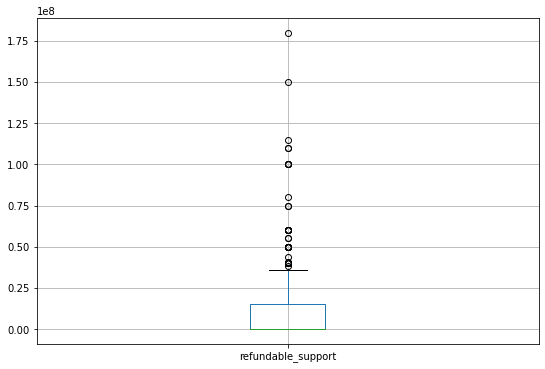

In [43]:
movies.boxplot(column=['refundable_support'], figsize=(9,6))

<AxesSubplot:>

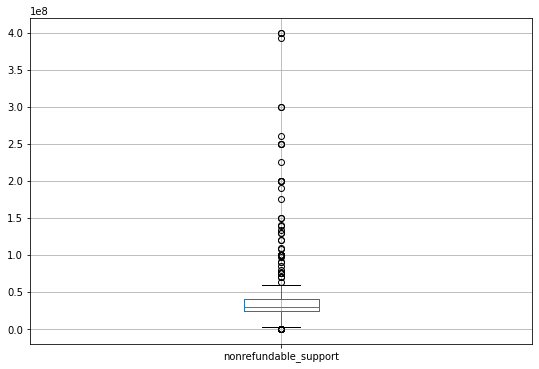

In [44]:
movies.boxplot(column=['nonrefundable_support'], figsize=(9,6))

<AxesSubplot:>

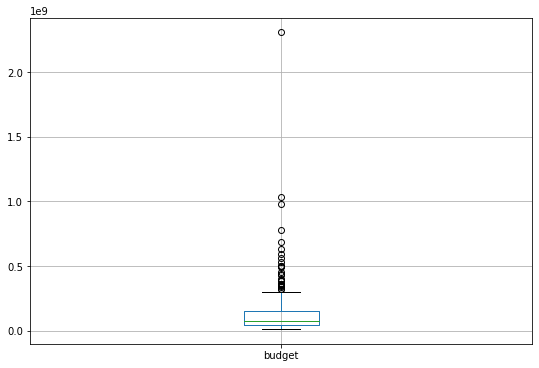

In [45]:
movies.boxplot(column=['budget'], figsize=(9,6))

<AxesSubplot:>

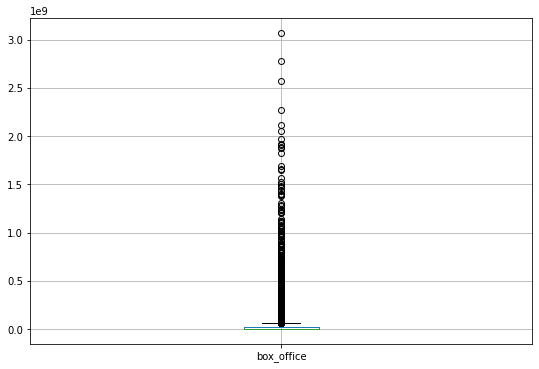

In [46]:
movies.boxplot(column=['box_office'], figsize=(9,6))

<AxesSubplot:>

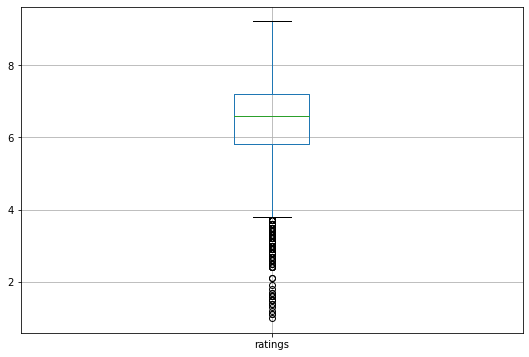

In [47]:
movies.boxplot(column=['ratings'], figsize=(9,6))

Во всех количественных данных видно достаточно много аномально высоких значений (выше Q3+1.5*IQR), это показывает, что есть много фильмов, у которых сумма господдержки, бюджет и сумма сборов фильма выше, чем у большинства. Это выглядит логично, так как большинство фильмов должны быть недорогими (например для телевидиния или категории Б), но при этом достаточно много высокобюджетных кассовых фильмов (для кинотеатров, категории А).

Много фильмов аномально низким рейтингом - причиной этого, скорее всего, является то, что большинство фильмов с малым бюджетом, они нацелены на узкую группу людей, сняты низкоквалифицированными специалистами с худшей проработкой или были сняты для освоения господдержки и цели в получении прибыли не имели.

### Добавление новых столбцов

Добавим столбец с годом выхода фильма

In [48]:
movies['year'] = pd.DatetimeIndex(movies['show_start_date']).year

In [49]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915.00,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716.00,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416.00,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
5,Остановился поезд,111013816.00,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016
6,Любовь и голуби,111007013.00,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013


Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма

In [50]:
def first_word(row): # функция возвращает первое значение, разделитель ","
    return row.str.split(',').str.get(0)

In [51]:
movies['main_director'] = first_word(movies['director'])
movies['main_genre'] = first_word(movies['genres'])

In [52]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,Открытый простор,221048915.00,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716.00,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416.00,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816.00,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013.00,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [53]:
movies['support_to_budget'] = (movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']

In [54]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
0,Открытый простор,221048915.00,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716.00,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416.00,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
5,Остановился поезд,111013816.00,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма,NaN
6,Любовь и голуби,111007013.00,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама,NaN


### Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<AxesSubplot:title={'center':'Количество вышедших в прокат фильмов по годам'}, xlabel='year', ylabel='Количество фильмов'>

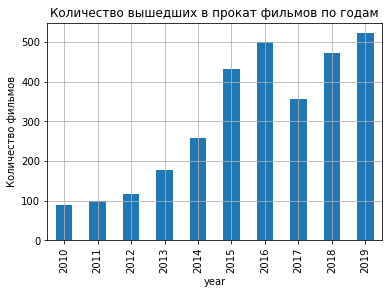

In [55]:
movies.groupby('year')['box_office'].count().plot(kind='bar', grid=True, 
    title='Количество вышедших в прокат фильмов по годам', 
                                                  ylabel='Количество фильмов')

Из данных видно, что больше всего фильмов вышло в прокат в 2016 году, меньше всего в 2010.

<AxesSubplot:xlabel='year'>

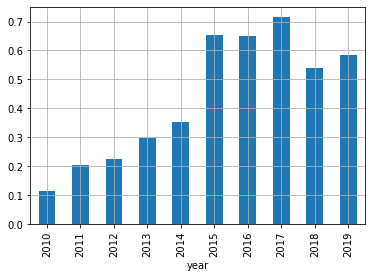

In [56]:
(movies.groupby('year')['box_office'].
 count() / movies.groupby('year')['puNumber'].count()).plot(kind='bar', grid=True)

Из данных видно, что до 2012 года фильмов с указанием данных о прокате меньше 10%, с 2012 года фильмов с указанием о прокате меньше 25% не было, за исключением 2018 года. Больше всего данных о прокате в 2013 году (более 40% )

Посмотрим, как менялась динамика проката по годам

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019')])

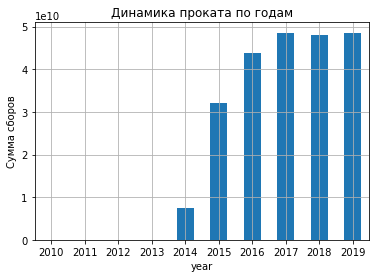

In [57]:
movies.groupby('year')['box_office'].sum().plot(kind='bar', grid=True, \
    title='Динамика проката по годам', ylabel='Сумма сборов')
plt.xticks(rotation = 'horizontal')

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [58]:
movies.pivot_table(index=['year'], values='box_office', aggfunc={'median', 'mean', 'sum'})

,mean,median,sum
year,,,
2010,26981.14,1868.00,2374340.00
2011,142289.69,3042.50,13944390.00
2012,55733.71,6692.50,6465111.00
2013,169139.39,3565.00,29768532.00
2014,28687154.00,22490.00,7372598784.00
2015,74442344.00,4327265.50,32084649984.00
2016,87288312.00,3640802.25,43731443712.00
2017,136408864.00,10177834.00,48561553408.00
2018,101633464.00,8821499.00,47970992128.00


Из сводной таблицы видно, что средняя и медианная сумма сборов увеливаются, за исключением 2019 года.  
Средние и медианные значения имеют сильные отличия (на один порядок), это связано с тем, что есть небольшое количество дорогих фильмов (которые снимаются для показа в кинотеатрах) и большое количество менее бюджетных фильмов (для телевидения или показа на онлайн площадках).

Определим, как влияет возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

In [59]:
movies.query('year > 2014').pivot_table(
     index='age_restriction',
     values = 'box_office',
     aggfunc = ['sum', 'count', 'mean'])

,sum,count,mean
,box_office,box_office,box_office
age_restriction,,,
«0+» - для любой зрительской аудитории,703345344.00,87,8084429.00
«12+» - для детей старше 12 лет,58930831360.00,343,171810000.00
«16+» - для детей старше 16 лет,68945960960.00,776,88847880.00
«18+» - запрещено для детей,36685389824.00,765,47954756.00
«6+» - для детей старше 6 лет,55492517888.00,311,178432544.00


([<matplotlib.axis.XTick at 0x7fd734b44790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

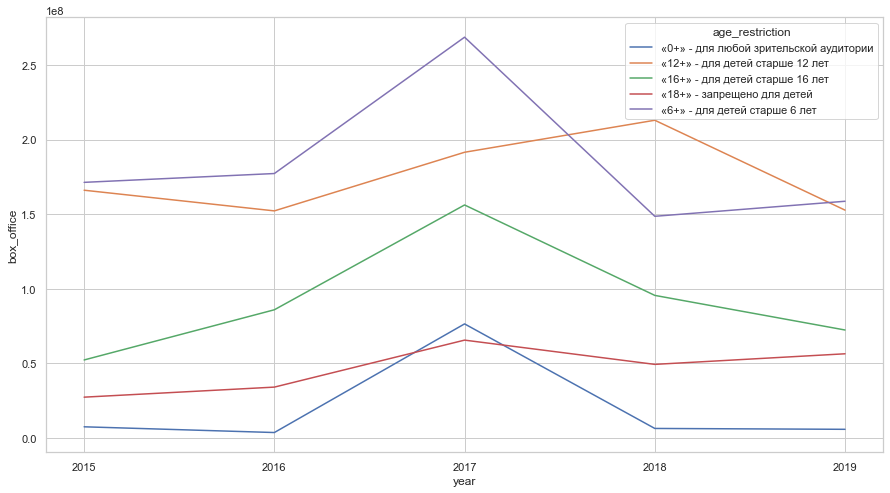

In [60]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')
sns.lineplot(data=movies.query('year > 2014').groupby(['year', 'age_restriction'], as_index=False)['box_office'].\
             mean() , x='year', y='box_office', hue='age_restriction')
plt.xticks(range(2015, 2020, 1))

In [61]:
movies.query('year > 2014').pivot_table(
     index='year',
     columns = 'age_restriction',
     values = 'box_office',
     aggfunc = ['sum', 'median'])

sum  \
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2015                                      273367776.00   
2016                                      150183552.00   
2017                                      229598944.00   
2018                                       32449002.00   
2019                                       17746066.00   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year                                              
2015                             11957220352.00   
2016                             12178336768.00   
2017                              7851427840.00   
2018                             14267291648.00   
2019                             12676553728.00   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year                                                                          
2015                              8274253312.00               3184098048.00   
2016                             14359349248.00               4990430208.00   
2017                             18742890496.00               9651495936.00   
2018                             14820922368.00               8745356288.00   
2019                             12748542976.00              10114009088.00   

                                               \
age_restriction «6+» - для детей старше 6 лет   
year                                            
2015                            8395710464.00   
2016                           12053144576.00   
2017                           12086141952.00   
2018                           10104974336.00   
2019                           12852548608.00   

                                                median  \
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2015                                        2767310.50   
2016                                        2687778.50   
2017                                       22178956.00   
2018                                        3616937.25   
2019                                        3885434.50   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year                                              
2015                                15144119.00   
2016                                 4690635.00   
2017                                 9010548.00   
2018                                 8931966.00   
2019                                 3591456.25   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year                                                                          
2015                                 4170454.50                  4011143.25   
2016                                 3659719.50                  5667493.00   
2017                                10150100.00                  8212677.00   
2018                                 8751896.00                  7179466.00   
2019                                 3237407.00                  5901733.50   

                                               
age_restriction «6+» - для детей старше 6 лет  
year                                           
2015                              20380982.00  
2016                               3698272.00  
2017                              51992104.00  
2018                              14688850.00  
2019                              12875350.00

([<matplotlib.axis.XTick at 0x7fd735221130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

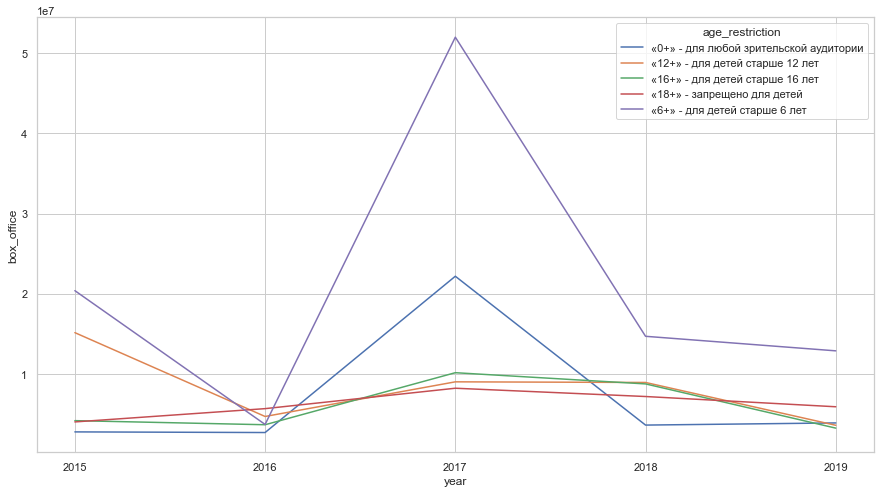

In [62]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')
sns.lineplot(data=movies.query('year > 2014').groupby(['year', 'age_restriction'], as_index=False)['box_office'].\
             median() , x='year', y='box_office', hue='age_restriction')
plt.xticks(range(2015, 2020, 1))

Большие сборы собирают фильмы категории«6+» - для детей старше 6 лет, меньше остальных с 2017 года собирают фильмы категории «12+» - для любой зрительской аудитории, остальные категории в среднем собирают одиннаково.  
Для выявления тренда на увеличение или уменьшение сборов фильмов необходимо проанализировать более длинный период. Из тех данных, что у нас есть видно, что среднее значение сборов фильмов по категориям не зависит от года.

### Исследуем фильмы, которые получили государственную поддержку

Посчитаем какую прибыль принесли фильмы с господдержкой, вычтя из суммы сборов сумму бюджета.

In [63]:
movies.loc[movies['budget'] > 0]['box_office'].sum() - movies.loc[movies['budget'] > 0]['budget'].sum()

-1838530600.0

<AxesSubplot:xlabel='year'>

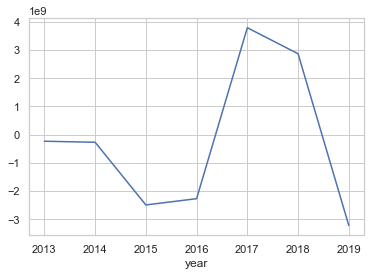

In [64]:
(movies.loc[movies['budget'] > 0].groupby('year')['box_office'].sum() - \
    movies.loc[movies['budget'] > 0].groupby('year')['budget'].sum()).plot()

Фильмы с господдержкой преимущественно убыточны, наблюдается тренд на увеличение убыточности от года к году

Найдем средний рейтинг фильмов с господдержкой

In [65]:
movies.loc[movies['budget'] > 0]['ratings'].mean()

6.01

In [66]:
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')

<AxesSubplot:xlabel='year'>

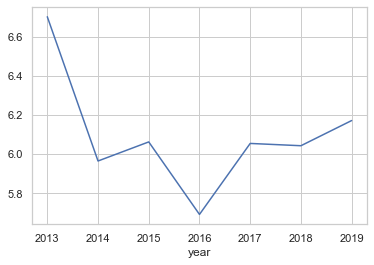

In [67]:
movies.loc[movies['budget'] > 0].groupby('year')['ratings'].mean().plot()

Рейтинг фильмов с господдержкой достаточно высок (в среднем выше 6), по годам изменяется, но тренда не наблюдается

Определим какой процент составляют невозвратные средства в бюджете фильмов с господдержкой

In [68]:
movies.loc[movies['budget'] > 0]['nonrefundable_support'].sum() / movies.loc[movies['budget'] > 0]['budget'].sum()

0.3571181

<AxesSubplot:xlabel='year'>

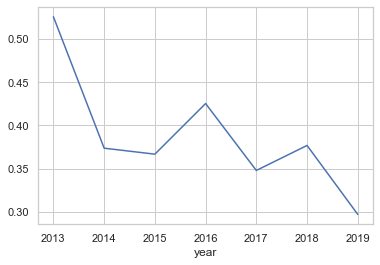

In [69]:
(movies.loc[movies['budget'] > 0].groupby('year')['nonrefundable_support'].sum() / \
 movies.loc[movies['budget'] > 0].groupby('year')['budget'].sum()).plot()

Процент невозвратных средств в бюджете фильма уменьшается с годами

Определим какой процент составляет поддержка в бюджете фильмов с господдержкой

In [70]:
(movies.loc[movies['budget'] > 0]['nonrefundable_support'].sum() + \
 movies.loc[movies['budget'] > 0]['refundable_support'].sum()) / movies.loc[movies['budget'] > 0]['budget'].sum()

0.44333908

<AxesSubplot:xlabel='year'>

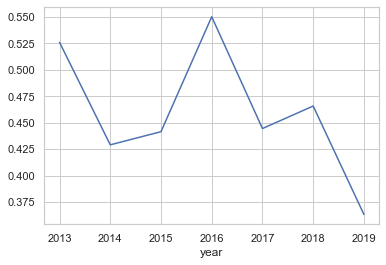

In [71]:
((movies.loc[movies['budget'] > 0].groupby('year')['nonrefundable_support'].sum() + \
    movies.loc[movies['budget'] > 0].groupby('year')['refundable_support'].sum()) / \
    movies.loc[movies['budget'] > 0].groupby('year')['budget'].sum()).plot()

Процент суммарной господдержки фильма не зависит от года

Проверим зависит ли сумма сборов от источника финасирования

In [72]:
movies.groupby('financing_source')['box_office'].sum() - movies.groupby('financing_source')['budget'].sum()

financing_source
Министерство культуры              -6101443584.00
Министерство культуры, Фонд кино   -1820971264.00
Фонд кино                           8857219072.00
dtype: float32

Фильмы с господдержкой в среднем убыточны, сумма поддержки в среднем составляет 50% от бюджета фильма, средний рейтинг составляет 6.1, сумма сборов не зависит от источника финансирования.

### Общий вывод

В данном проекте нашей задачей было провести анализ рынка российского кинопроката и выявить текущие тренды.  

В ходе проекта были выполнены:  
предобработка данных - были объединены две таблицы в одну для анализа, поменяны типы данных для уменьшения затрачиваемой памяти, были посчитаны и проанализированы пропуски, были выявлены и удалены дубликаты, в столбцах с категориальными значениями были удалены лишние пробелы, были устранены ошибки в количественных значениях столбца budget;  
были добавлены новые столбцы - с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма, доля государственной поддержки от общего бюджета фильма;  
был проведен исследовательский анализ - посчитано количество фильмов, выходивших каждый год в прокат, изучено, как менялась динамика проката по годам, было определено в каких годах сумма сборов была минимальной и максимальной, была посчитана средняя и медианная сумма сборов для каждого года, было проанализорано влияние возрастного ограничения на сборы; 
был проведен анализ фильмов с господдержкой - проверено приносят ли фильмы с гоподдержкой прибыль, был определен средний рейтинг фильмов, какой процент в бюджете фильмов составляет поддержка, зависит ли сумма сборов от источника финансирования.

В ходе работы были получены следующие выводы:
не выявлено зависимости количества вышедших в прокат фильмов от года, но сами значения сильно отличаются год от года;
наблюдается тренд к увеличению суммы сборов в зависимости от года, наблюдаются сильные увеличения сумм сборов в 2014 и 2015 годах;
наблюдается увеличение средних и медианных значений сборов с увеличением года;
зависимости средней суммы сборово от возростного ограничения фильмов не наблюдается, в разные фильмы с разными возрастными ограничениями собирали маибольшие суммы, думаю, это может быть связано с выходом кассовых фильмов этих возрастных категорий в эти года, чаще других меньше всех собирают фильмы категории "0+" - возможно, фильмы данной категории рассчитаны на маленьких детей, которые обычно в кино не ходят, а более взрослым категориям людей эти фильмы не интересны;
из анализа фильмов с господдержкой можно сделать вывод, что эти фильмы не окупаются, вероятно это наблюдается из-за того, что требуется вернуть только возратную часть бюджета, поэтому создатели этих фильмов не сильно заинтересованы в возврате затраченных средств (в случае если создатели фильма не принесуют прибыль инвестору, то впоследствии инвесторы не будут заинтересованы вновь сотрудничать с создателями), государство хуже отбирает фильмы для поддержки, поэтому туда попадают фильмы, которые не так интересны людям; при этом достаточно высокий рейтинг этих фильмов показывает, что многие из тех, кто посмотрел эти фильмы остались довольны.